
1000 * {"MCParticles.PDG": var * int32, "MCParticles.generatorStatus": var * int32, "MCParticles.simulatorStatus": var * int32, "MCParticles.charge": var * float32, "MCParticles.time": var * float32, "MCParticles.mass": var * float64, "MCParticles.vertex.x": var * float64, "MCParticles.vertex.y": var * float64, "MCParticles.vertex.z": var * float64, "MCParticles.endpoint.x": var * float64, "MCParticles.endpoint.y": var * float64, "MCParticles.endpoint.z": var * float64, "MCParticles.momentum.x": var * float32, "MCParticles.momentum.y": var * float32, "MCParticles.momentum.z": var * float32, "MCParticles.momentumAtEndpoint.x": var * float32, "MCParticles.momentumAtEndpoint.y": var * float32, "MCParticles.momentumAtEndpoint.z": var * float32, "MCParticles.spin.x": var * float32, "MCParticles.spin.y": var * float32, "MCParticles.spin.z": var * float32, "MCParticles.colorFlow.a": var * int32, "MCParticles.colorFlow.b": var * int32, "MCParticles.parents_begin": var * uint32, "MCParticles.p

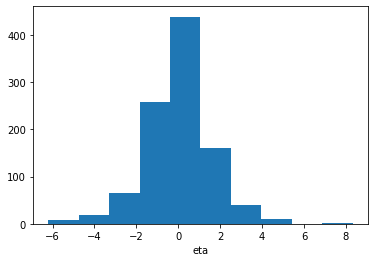

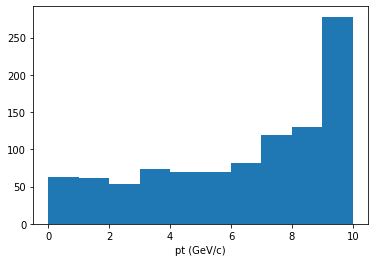

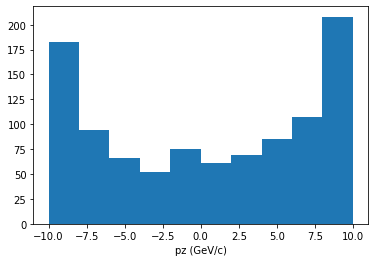

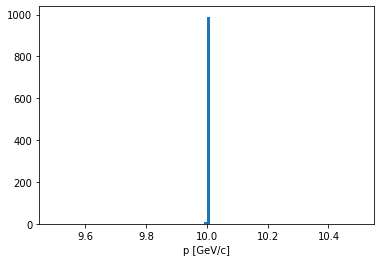

Secondary particles analysis...
----
Array types...
<class 'awkward.highlevel.Array'>
<class 'awkward.highlevel.Array'>
<class 'numpy.ndarray'>
----


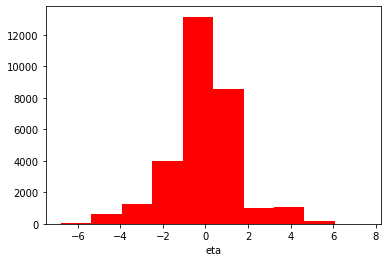

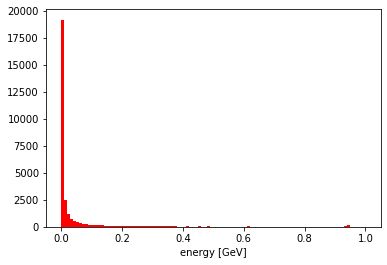

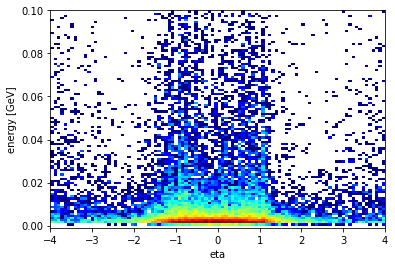

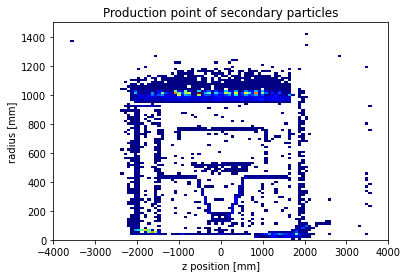

In [25]:
import uproot
import awkward as ak
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#load ROOT file and get MCParticles branches
events = uproot.open('input/output.edm4hep.root:events')

arrays = events.arrays(filter_name="MCParticles/*")
print("")
print(arrays.type)
print("")

#cuts to apply
cut_primary = arrays["MCParticles.generatorStatus"]==1
cut_secondary = arrays["MCParticles.generatorStatus"]==0

#primary particle analysis (we simulated single electron here)
print("Primary particle analysis...")

px = arrays["MCParticles.momentum.x"][cut_primary]
py = arrays["MCParticles.momentum.y"][cut_primary]
pz = arrays["MCParticles.momentum.z"][cut_primary]
mass = arrays["MCParticles.mass"][cut_primary]

pt = np.sqrt(px**2+py**2)
mom = np.sqrt(px**2+py**2+pz**2)
energy = np.sqrt(mom**2+mass**2)
theta = np.arccos(pz/mom)
eta = -1.*np.log( np.tan(theta/2.) )

#Checking array lengths and mulitple cuts
print("----")
print("Counting arrays...")
print("")
print("px -- no cut:")
print(arrays["MCParticles.momentum.x"])
print("Array lengths for two branches:")
print(ak.count(arrays["MCParticles.momentum.x"],axis=-1))
print(ak.count(arrays["MCParticles.generatorStatus"],axis=-1))
print("")
print("px -- primary particle cut:")
print(px)
print(ak.count(px,axis=-1))
print("")
print("eta -- primary particle cut:")
print(eta)
print(ak.count(eta,axis=-1))
print("")
print("px -- additional eta cuts:")
print(px[(eta>-1) & (eta<1)])
print(px[(eta<-1) | (eta>1)])
print("")
print("py -- primary particle cut:")
print(py)
print("")
print("px -- eta and py cuts:")
print(px[(eta>-1) & (eta<1) & (py>0)])
print("----")

#Don't need to flatten since all events have a single primary particle
plt.hist(eta,label="eta")
plt.xlabel("eta")
plt.show()
plt.hist(pt,label="pt")
plt.xlabel("pt (GeV/c)")
plt.show()
plt.hist(pz,label="pz")
plt.xlabel("pz (GeV/c)")
plt.show()
plt.hist(mom,label="p",bins=100,range=[9.5,10.5])
plt.xlabel("p [GeV/c]")
plt.show()

#secondary particles analysis
print("Secondary particles analysis...")

vx = arrays["MCParticles.vertex.x"][cut_secondary]
vy = arrays["MCParticles.vertex.y"][cut_secondary]
vz = arrays["MCParticles.vertex.z"][cut_secondary]
px = arrays["MCParticles.momentum.x"][cut_secondary]
py = arrays["MCParticles.momentum.y"][cut_secondary]
pz = arrays["MCParticles.momentum.z"][cut_secondary]
mass = arrays["MCParticles.mass"][cut_secondary]

pt = np.sqrt(px**2+py**2)
mom = np.sqrt(px**2+py**2+pz**2)
energy = np.sqrt(mom**2+mass**2)
theta = np.arccos(pz/mom)
eta = -1.*np.log( np.tan(theta/2.) )
radius = np.sqrt(vx**2+vy**2)

#N.B. need to flatten arrays since variable size for each event
#.... also for 2D hist, convert to numpy array
print("----")
print("Array types...")
print(type(energy))
print(type(ak.flatten(energy)))
print(type(np.array(ak.flatten(energy))))
print("----")

plt.hist(ak.flatten(eta),label="eta",fc='red')
plt.xlabel("eta")
plt.show()

plt.hist(ak.flatten(energy),label="energy",bins=100,range=[0,1],fc='red')
plt.xlabel("energy [GeV]")
plt.show()

plt.hist2d(np.array(ak.flatten(eta)),np.array(ak.flatten(energy)),bins=(100,100),range=([-4,4],[-1e-3,0.1]),
           norm=mpl.colors.LogNorm(),cmap=plt.cm.jet)
plt.xlabel("eta")
plt.ylabel("energy [GeV]")
plt.show()

plt.hist2d(np.array(ak.flatten(vz)),np.array(ak.flatten(radius)),bins=(100,100),range=([-4e3,4e3],[0,1.5e3]),
           cmap=plt.cm.jet,cmin = 1)
plt.title("Production point of secondary particles")
plt.xlabel("z position [mm]")
plt.ylabel("radius [mm]")
plt.show()
